# Introduction

We conducted numerous experiments on the validity of alternative approaches toward the Wild Bootstrap (i.e., adding noise to original time series) by testing different methodologies' efficacies in capturing the true nature of financial time series statistical moments (e.g., mean, std, skew, kurtosis), the variance of these statistics, posterior distribution, and overall latent risk factors that have yet to be observed.

# Motivation

The Wild Bootstrap is a nonparametric resampling method designed for heteroskedastic data, where the variance changes over time. It is particularly useful in financial econometrics, where volatility clustering is commonly observed. The Wild Bootstrap generates synthetic datasets by resampling the original dataset with random perturbations.

Despite the seemingly apt features of the Wild Bootstrap in capturing the effects of financial time series, independently conducted and external empirical research suggests that this approach does not sufficiently capture the latent and patent features of time series, namely regarding higher moments such as skew and kurtosis. 

Thus, the goal of this study is to formulate an extension of the Wild Bootstrap that maintains its objective of modeling heteroskedasticity and volatility clustering, but adds the feature of capturing the true potential of time series statistical moments.

# Null Hypothesis (H0):

Bootstrap methodology "i" cannot capture financial time series' statistical moments, variance of these statistics, and posterior distributions better than the original implementation of the Wild Bootstrap.

# Alternative Hypothesis (H1): 

There exists an extension of the traditional Wild Bootstrap approach that more accurately captures the effects of financial time series as measured by statistical moments and variance of these measures.

# Methodology

Extensive documentation of all alternative methodologies tested is recorded in the prior cells of the notebook; however, it is important to highlight key approaches that led to our final discovery. 

1. Gaussian (Original)Implementation: <br><br>
Scale randomly generated noise via the Standard Normal Distribution by bootstrapped samples from original time series... then add this noise to original time series.

2. Laplace Distribution Implementation: <br><br>
Scale randomly generated noise via the Standard Laplace Distribution by bootstrapped samples from original time series... then add this noise to original time series. This adds significantly more kurtotic (fat tailed) noise elements to returns with the objective of modeling both the prior and posterior distributions' skew and kurtosis more accurately.

3. Skewed Implementation: <br><br>
Instead of leveraging a standard distribution to generate noise, the returns themselves are utilized. <br><br>
However, these returns are scaled by the empirical distribution's non-parametric skew by multiplying the absolute value of returns by (1 + skew) for positively skewed returns or (-1 + skew) for negatively skewed returns, which are then concatenated with the non-scaled (i.e., original) returns of the inverse sign (+1 or -1). This step structurally embeds a negative or positive bias amongst this series of skewed/imbalanced returns. <br><br>
This set of skewed/imbalanced returns are then standardized with a Z-Score to ensure mean = 0 and std = 1, mimicking the original implementation's Standard Normal noise element. <br><br>
This skewed noise component is then scaled by the absolute value of a bootstrapped set from the newly constructed series of imbalanced/skewed returns. This absolute value component ensures that the imbalance/skew is maintained throughout the noise. The scaled skewed noise set is then added back to the original returns. 

# Results

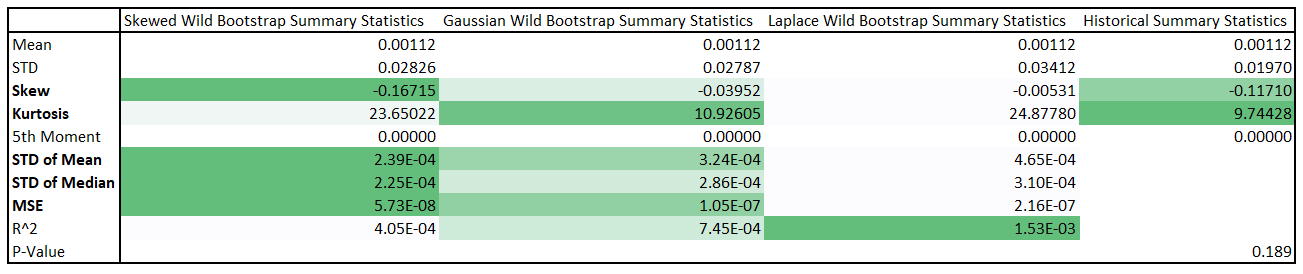


1. Gaussian Wild Bootstrap (Original Approach): <br><br>
Generates a skew that is 3X smaller than the historically observed skew. This is diametrically opposed to the notion of latent tail risk which financial practitioners must account for. Thus, this is an unrealistic synthesis of financial time series that does not capture latent or patent tail-risk.<br><br>
Reasserting the previous commentary, synthetic kurtosis must be higher than historical kurtosis. The Gaussian implementation generates a kurtosis of ~11, much more conservative than the Asymmetric Wild Bootstrap. Therefore, despite this implementation's accuracy in modeling historical kurtosis at ~9, this may not sufficiently capture the extreme characteristics of the posterior distribution.

2. Laplace Distribution Implementation: <br><br>
Although Laplace was initially hypothesized to add skew to the synthetic distribution, the results produce even less skew than the Gaussian implementation and historical distribution (again, this is fundamentally ignoring latent tail-risk). This is due to the fact that Standard Laplace is not skewed, but leptokurtic.<br><br>
On a similar note, the conclusions about the Laplace implementation are inversely related to the Gaussian implementation. This approach generates a similar kurtosis compared to the asymmetric implementation. This indicates that Laplace and asymmetric implementations both capture the latent kurtosis risks embedded within the financial time series; however, the asymmetric approach also captures latent skew risks whereas Laplace severely underestimates this factor.

3. Asymmetric Wild Bootstrap (New Approach): <br><br>
According to empirical studies across S&P 500 constituents, our independently formulated bootstrap method of generating skewed noise accomplishes its objective of more efficiently capturing skew of the true distribution of financial time series at a statistically significant level.<br><br>
This novel extension of the traditional Wild Bootstrap significantly overestimates the time series' historical kurtosis at ~23 vs. ~10. Despite the large deviation, this is not necessarily a poor approximation of the returns' posterior distribution. As mentioned, the objective of bootstrap is to estimate the posterior distribution and latent risks of a time series that have yet to be observed. Since these are latent features, they definitionally must be more extreme than what was historically observed. Thus, it is intuitive that kurtosis should be meaningfully higher than the empirical distribution's kurtosis.<br><br>
The question here is how much higher? According to previous empirical research, returns better follow a Laplace Distribution than a Normal Distribution. This necessitates significant excess kurtosis and perhaps more latent risk than once thought. Therefore, the Asymmetric Wild Bootstrap sufficiently captures the 4th statistical moment and the latent features of this statistic.

4.  STD of Mean, STD of Medeian, MSE, & T-Stat: <br><br>
These metrics are used as proxies for stability, reliability, and statistical significance of these experiments. They can be summarized with MSE & T-Stats. <br><br>
The MSE tells us the average squared deviation across the simulation from original return series. Generally, you want a lower MSE which indicates a more accurate estimation of the true distribution of returns. <br><br>
The T-Stat is a measure of statistical significance and tells us how variable our estimation is. A T-Stat greater than 2 is sufficiently significant. <br><br>
By leveraging Mean Squared Error (MSE) and each method’s T-Stat, it is clear that the Asymmetric Wild Bootstrap generates a much more stable, reliable, accurate, and statistically significant estimate of the posterior distribution than the alternative methodologies. Gaussian (original) Wild Bootstrap generates the second highest quality estimation, whereas Laplce Wild Bootstrap generates significantly inferior synthetic time series.

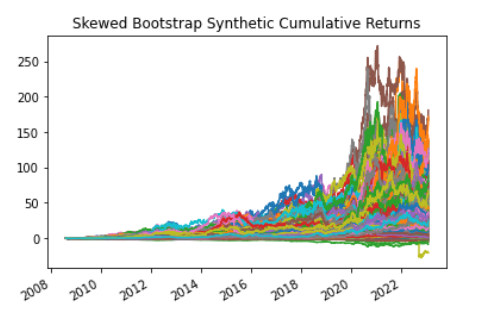

# Conclusion

Overall, novel creations like the Asymmetric Wild Bootstrap have the potential to completely alter the way portfolio managers, quantitative researchers, or traders approach risk management, strategy creation, and portfolio allocation. The most promising and impactful areas of study frequently stem from existing frameworks. It is the job of a Quant to dissect these techniques, leverage creativity, and build innovative tools that ultimately generate Alpha.

# Code Implementation

In [68]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import pickle

In [252]:
path = r'C:\Users\marcu\Documents\Quant\Programming\Data\russell_300_returns.pickle'

with open(path, 'rb') as reader:
    returns = pickle.load(reader)

In [209]:
np.percentile(returns.dropna(), 1)

-0.0536214762173367

In [16]:
s = np.empty(returns.shape[1])
for i, col in enumerate(returns.columns):
    s[i] = stats.skew(returns[col].dropna())

s = pd.Series(s)

C:\Users\marcu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\scipy\stats\stats.py:951: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean


In [80]:
s.nlargest(20)

745    56.3468
2193   51.9665
2157   49.4997
2039   38.4139
1566   38.3469
1546   29.1937
2212   27.9192
1512   27.4755
769    25.7351
1760   25.5695
1978   24.4304
1295   22.1665
2185   22.0553
2241   21.8656
2123   21.0636
2095   20.2726
2056   19.7587
1112   19.5928
2191   18.9864
2215   18.6332
dtype: float64

In [204]:
returns = returns.iloc[:, 0].dropna()

'AAPL'

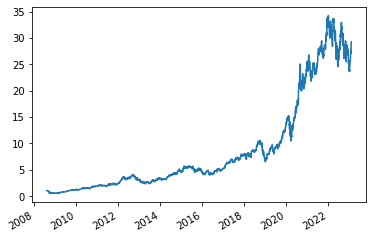

In [205]:
(1+returns).cumprod().plot()
returns.name

# Functions

In [244]:
def bootstrap_summary_data(synthetic_data: pd.DataFrame, empirical_data: pd.Series):

        # Change desired formatting
        pd.options.display.float_format = '{:.4f}'.format

        # Declare temp hash tables to store relevant statistics
        bootstrap_summary_data = {}
        empirical_summary_data = {}
               
        # Mean
        mean = np.mean(np.mean(synthetic_data))
        bootstrap_summary_data['Mean'] = mean
        empirical_summary_data['Mean'] = np.mean(empirical_data)

        # Standard Deviation
        mean_std = np.mean(np.std(synthetic_data))
        bootstrap_summary_data['STD'] = mean_std
        empirical_summary_data['STD'] = np.std(empirical_data)

        # Mean Skew
        mean_skew = np.mean(stats.skew(synthetic_data))
        bootstrap_summary_data['Skew'] = mean_skew
        empirical_summary_data['Skew'] = stats.skew(empirical_data)

        # Mean Kurtosis
        mean_kurtosis = np.mean(stats.kurtosis(synthetic_data, fisher=False))
        bootstrap_summary_data['Kurtosis'] = mean_kurtosis
        empirical_summary_data['Kurtosis'] = stats.kurtosis(empirical_data, fisher=False)

        # Mean 5'th Moment (Asymmetry of Tails)
        mean_5th_moment = np.mean(stats.moment(synthetic_data, moment=5))
        bootstrap_summary_data['5th Moment'] = mean_5th_moment
        empirical_summary_data['5th Moment'] = stats.moment(empirical_data, moment=5)

        # Standard Deviation of Mean
        std_mean = np.std(np.mean(synthetic_data))
        bootstrap_summary_data['STD of Mean'] = std_mean

        # Standard Deviation of Median
        std_median = np.std((synthetic_data).median())
        bootstrap_summary_data['STD of Median'] = std_median

        # Mean Squared Error
        mse = ((synthetic_data.mean() - empirical_data.mean())**2).mean()
        bootstrap_summary_data['MSE'] = mse

        # R^2
        r_2 = np.sum((synthetic_data.mean() - empirical_data.mean())**2) / np.sum((empirical_data - empirical_data.mean())**2)
        bootstrap_summary_data['R^2'] = r_2

        # P-Value
        synth_cum_rets = (np.exp(np.log(synthetic_data+1).cumsum().iloc[:, 0:1000])-1).iloc[-1,:] # use log returns for faster computations
        empirical_cum_rets = ((1+empirical_data).cumprod()-1).iloc[-1]
        p_value = len(synth_cum_rets[synth_cum_rets>empirical_cum_rets]) / len(synth_cum_rets)
        empirical_summary_data['P-Value'] = p_value


        # Summarize Data
        bootstrap_summary_data = pd.Series(bootstrap_summary_data, name='Bootstrap Summary Statistics')
        empirical_summary_data = pd.Series(empirical_summary_data, name='Historical Summary Statistics')

        summary_data = pd.concat([bootstrap_summary_data, empirical_summary_data], axis=1)
        
        return summary_data

def asymmetric_wild_bootstrap(returns: pd.Series, n_samples=10000):
    """ Generate synthetic time series by adding asymmetric (skewed) noise to original time series. This differs from
        the original implementation of Wild Bootstrap in that instead of using (1, -1) or a standard distribution to
        generate noise, it is produced by re-scaling returns according to their skew, normalizing these returns which 
        enables the noise to have a mean = 0, stdev = 1, and be rescaled according to randomly sampled returns which mimicks 
        the original implementation's noise component.

        In the original construction of Wild Bootstraps, skew was not sufficiently captured. With the Asymmetric Wild Bootstrap, 
        skew is directly considered in the computation of noise, more efficiently capture the dynamics of financial time series 
        and posterior distribution.

    Args:
        returns (pd.Series): time series of returns.
        n_samples (int, optional): number of synthetic time series generated. Defaults to 10000.
    """
    
    # Initialize length per sample        
    n = len(returns) 
    
    # Initialize bootstrap samples matrix
    asymmetric_wild_bootsrapped_samples = np.empty((n_samples, n))

    # Generate n_samples of length n
    for i in range(0, n_samples):

        # Nonparametric version of skew
        skew = (returns.mean() - returns.median())/returns.std() 
        # skew = stats.skew(returns) / 2

        # Scale returns series according to its skew
        if skew > 0: 
            neg_samples = np.abs(returns)*-1
            pos_samples = np.abs(returns)*(1+skew)
        else:
            neg_samples = np.abs(returns)*-1*(1-skew)
            pos_samples = np.abs(returns)*1

        scaled_returns = np.array([neg_samples, pos_samples]).reshape(neg_samples.shape[0]*2) 

        # Bootstrap asymmetrically scaled returns and normalize via Z-Score
        wild_noise = np.random.choice(scaled_returns, size=n, replace=True)
        wild_noise = (wild_noise - wild_noise.mean()) / wild_noise.std()

        # Scale noise with absolute value of newly bootstrapped skewed returns
        wild_noise = np.abs(np.random.choice(scaled_returns, size=n, replace=True)) * wild_noise

        # Add noise to original returns
        asymmetric_wild_bootsrapped_samples[i] = (returns + wild_noise).values 



    return pd.DataFrame(asymmetric_wild_bootsrapped_samples, columns=returns.index).T
    
def wild_bootstrap_original(returns: pd.Series, n_samples=10000, normal=True):
    """
    Perform Wild Bootstrap on a 1D array of financial time series data.

    Args:
    returns (numpy.ndarray or pd.Series): A 1D array of data.
    n_samples (int): The number of resamples to generate.
    normal (bool): Determines the probability distribution of the noise element (Gaussian or Laplace).

    For more information on Laplace Distribution: https://www.statisticshowto.com/laplace-distribution-double-exponential/
    For more information on Wild Bootstrap Method: https://stats.stackexchange.com/questions/408651/intuitively-how-does-the-wild-bootstrap-work
    
    Returns:
    pd.DataFrame: An matrix of bootstrapped returns.
    """

    # Initialize length per sample
    n = len(returns)

    # Initialize bootstrap samples matrix
    wild_bootsrapped_samples = np.empty((n_samples, n))

    # Generate n_samples of length n
    for i in range(0, n_samples):
        
        # ------------------------------------------- Generate Noise -------------------------------------------
        if normal:
            # Generate random perturbations from a standardized distribution (e.g., Standard Normal)
            perturbations = np.random.standard_normal(n)

        else: 
            laplace_mu = 0
            laplace_beta =  np.sqrt(np.var(returns)/2)
            # perturbations = np.random.laplace(loc=laplace_mu, scale=laplace_beta, size=n)
            perturbations = np.random.laplace(loc=laplace_mu, scale=1, size=n)

        # ------------------------------------------- Scale Noise -------------------------------------------
        # Randomly sample returns (shuffle) from empirical distribution and scale by Gaussian perturbations
        
        # Scale noise element by bootstrapped returns
        wild_noise = np.random.choice(returns, size=n, replace=True) * perturbations
        
        # ------------------------------------------- Generate Samples -------------------------------------------
        # Add the wild noise to the original data
        wild_bootsrapped_samples[i] = (returns + wild_noise).values     
        
    return pd.DataFrame(wild_bootsrapped_samples, columns=returns.index).T


def bootstrap_VaR(bootstrap_returns: pd.DataFrame, alpha=99):
    """Compte Value at Risk & Conditional Value at Risk
    Args:
        bootstrap_returns (pd.DataFrame of np.array like): multiple synthetic time series.
        alpha (float, optional): confidence level for VaR. Defaults to 0.99.

    Returns:
        (VaR, CVaR): Value at Risk, Conditional Value at Risk
    """
    
    # Clean returns
    bootstrap_returns = bootstrap_returns.dropna()

    # Compute VaR and CVaR for all time series

    # Value at Risk
    VaR = np.percentile(bootstrap_returns, q=100-alpha)
    
    # Conditional Value at Risk (Expected Shortfall)
    CVaR = np.mean(np.mean(bootstrap_returns[bootstrap_returns<VaR]))

    return VaR, CVaR

# Experimental Dirty Function to Enhance Traditional Wild Bootstrap

In [118]:
def wild_bootstrap(returns: pd.Series, n_samples=10000, normal=True):
    """
    Perform Wild Bootstrap on a 1D array of financial time series data.

    Args:
    returns (numpy.ndarray or pd.Series): A 1D array of data.
    n_samples (int): The number of resamples to generate.
    normal (bool): Determines the probability distribution of the noise element (Gaussian or Laplace).

    For more information on Laplace Distribution: https://www.statisticshowto.com/laplace-distribution-double-exponential/
    For more information on Wild Bootstrap Method: https://stats.stackexchange.com/questions/408651/intuitively-how-does-the-wild-bootstrap-work
    
    Returns:
    pd.DataFrame: An matrix of bootstrapped returns.
    """

    # Initialize length per sample
    n = len(returns)

    # Initialize bootstrap samples matrix
    wild_bootsrapped_samples = np.empty((n_samples, n))

    # Generate n_samples of length n
    for i in range(0, n_samples):
        
        # ------------------------------------------- Generate Noise -------------------------------------------
        if normal:
            # Generate random perturbations from a standardized distribution (e.g., Standard Normal)
            perturbations = np.random.standard_normal(n)

        else: 
            laplace_mu = 0
            laplace_beta =  np.sqrt(np.var(returns)/2)
            # perturbations = np.random.laplace(loc=laplace_mu, scale=laplace_beta, size=n)
            perturbations = np.random.laplace(loc=laplace_mu, scale=1, size=n)

        # ------------------------------------------- Scale Noise -------------------------------------------
        # Randomly sample returns (shuffle) from empirical distribution and scale by Gaussian perturbations
        
        # ------------------------- wild_noise 1 -------------------------
        # Sample without replacement
        # wild_noise = np.random.choice(returns, size=n, replace=False) * perturbations 

        # ------------------------- wild_noise 2 -------------------------
        # Scale noise with original data
        # wild_noise = returns * perturbations

        # ------------------------- wild_noise 3 (best) -------------------------
        # Method to bootstrap the noise element... seems to make the returns more closely skewed 
        # to empirical distribution which may be a better approximation of the posterior:
        wild_noise = np.random.choice(returns, size=n, replace=True) * perturbations

        # ------------------------- wild_noise 4 -------------------------
        # Generate two bootstrapped samples and choose the higher of the two to generate negative skew:
        # This generates too negatively skewed returns with a negative mean... not a good approximation of posterior
        # wild_noise = np.empty(shape=(returns.shape[0]))
        # for j in range(0, n):
        #     wild_noise[j] = np.max(np.random.choice(returns, size=2, replace=True))
        # 
        # wild_noise = wild_noise * perturbations

        # ------------------------- wild_noise 5 (best for skew) -------------------------
        # skew = stats.skew(returns)

        # Nonparametric version of skew
        # skew = (returns.mean() - returns.median())/returns.std() 
        
        # if skew > 0: 
        #     neg_samples = np.abs(returns)*-1
        #     pos_samples = np.abs(returns)*(1+skew)
        # else:
        #     neg_samples = np.abs(returns)*-1*(1-skew)
        #     pos_samples = np.abs(returns)*1

        # scaled_returns = np.array([neg_samples, pos_samples]).reshape(neg_samples.shape[0]*2) 
        # wild_noise = np.random.choice(scaled_returns, size=n, replace=True)
        # wild_noise = (wild_noise - wild_noise.mean()) / wild_noise.std()
        # wild_noise = np.abs(np.random.choice(scaled_returns, size=n, replace=True)) * wild_noise
        # wild_bootsrapped_samples[i] = (returns + wild_noise).values        

        # ------------------------- wild_noise 6 -------------------------  
        # wild_noise = np.random.choice(returns, size=n, p=sampling_weights, replace=True)
        # wild_bootsrapped_samples[i] = (returns + wild_noise).values / 2 # Divide by 2 to average their values
        
        # ------------------------------------------- Generate Samples -------------------------------------------
        # ------------------------- generate samples 1 -------------------------
        # Add the wild noise to the original data
        wild_bootsrapped_samples[i] = (returns + wild_noise).values     

        # ------------------------- generate samples 2 -------------------------
        # Add the wild noise to the shuffled data
        # wild_bootsrapped_samples[i] = np.random.choice(returns, size=n, replace=False) + wild_noise
        
        # ------------------------- generate samples 3 -------------------------
        # Use if you want to center returns around mean (should be used in conjunction with bootstrapped noise)
        # wild_bootsrapped_samples[i] = (wild_noise + np.mean(returns)) 
        
    return pd.DataFrame(wild_bootsrapped_samples, columns=returns.index).T

# Asymmetric Wild Bootstrap

In [206]:
bootstrapped_sample_normal_SKEW = asymmetric_wild_bootstrap(returns, n_samples=10000)
bootstrap_summary_data(bootstrapped_sample_normal_SKEW, returns)

,Bootstrap Summary Statistics,Historical Summary Statistics
Mean,0.0011,0.0011
STD,0.0283,0.0197
Skew,-0.1672,-0.1171
Kurtosis,23.6502,9.7443
5th Moment,-0.0000,-0.0000
STD of Mean,0.0002,NaN
STD of Median,0.0002,NaN
MSE,0.0000,NaN
R^2,0.0004,NaN
P-Value,NaN,0.1890


18.401604797786614 0.006666666666666667


<AxesSubplot:title={'center':'Asymmetric Bootstrap Synthetic Cumulative Returns'}>

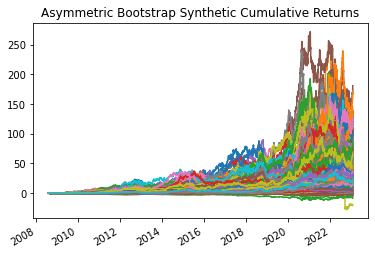

In [228]:
cum_rets_normal_SKEW = (1+bootstrapped_sample_normal_SKEW.iloc[:, 0:3000]).cumprod()-1
mean_portfolo_value_SKEW = cum_rets_normal_SKEW.iloc[-1, :].mean()
pct_neg = len(cum_rets_normal_SKEW.iloc[-1, :][cum_rets_normal_SKEW.iloc[-1, :]<0]) / len(cum_rets_normal_SKEW.iloc[-1, :])
print(mean_portfolo_value_SKEW, pct_neg)
cum_rets_normal_SKEW.plot(legend=None, title='Asymmetric Bootstrap Synthetic Cumulative Returns')

# Gaussian Noise Attempted Methodologies

Add the wild noise to the originally ordered data + scale noise by unshuffled returns  

Add the wild noise to the originally ordered data + scale noise by shuffled non-replaced returns

Add the wild noise to the original data + scale noise by shuffled replaced (bootstrapped) returns

Add the wild noise to shuffled data + scale noise by shuffled replaced (bootstrapped) returns

Add the wild noise to mean returns + scale noise by shuffled replaced (bootstrapped) returns

ORIGINAL METHOD: SCALE NOISE BY BOOTSTRAPPED RETURNS + ORIGINAL RETURNS DATASET

In [214]:
bootstrapped_sample_normal = wild_bootstrap_original(returns, n_samples=10000, normal=True)
bootstrap_summary_data(bootstrapped_sample_normal, returns)

,Bootstrap Summary Statistics,Historical Summary Statistics
Mean,0.0011,0.0011
STD,0.0279,0.0197
Skew,-0.0395,-0.1171
Kurtosis,10.9261,9.7443
5th Moment,-0.0000,-0.0000
STD of Mean,0.0003,NaN
STD of Median,0.0003,NaN
MSE,0.0000,NaN
R^2,0.0007,NaN
P-Value,NaN,0.2770


In [225]:
bootstrap_summary_data(bootstrapped_sample_normal, returns).to_clipboard()

Mean Cum Return = 27.769340933929275
 Percent Cum Rets < 0 = 0.012


<AxesSubplot:>

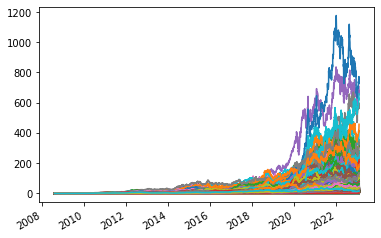

In [215]:
cum_rets_normal = (1+bootstrapped_sample_normal.iloc[:, 0:3000]).cumprod()-1
mean_portfolo_value = cum_rets_normal.iloc[-1, :].mean()
pct_neg = len(cum_rets_normal.iloc[-1, :][cum_rets_normal.iloc[-1, :]<0]) / len(cum_rets_normal.iloc[-1, :])
print(f'Mean Cum Return = {mean_portfolo_value}\n', f'Percent Cum Rets < 0 = {pct_neg}')
cum_rets_normal.plot(legend=None)

# Laplace Noise Bootstrap

Genrate noise compoennt from standard Laplace Distribution rather than Normal Distribution

In [216]:
bootstrapped_sample_laplace = wild_bootstrap_original(returns, n_samples=10000, normal=False)
bootstrap_summary_data(bootstrapped_sample_laplace, returns)

,Bootstrap Summary Statistics,Historical Summary Statistics
Mean,0.0011,0.0011
STD,0.0341,0.0197
Skew,-0.0053,-0.1171
Kurtosis,24.8778,9.7443
5th Moment,0.0000,-0.0000
STD of Mean,0.0005,NaN
STD of Median,0.0003,NaN
MSE,0.0000,NaN
R^2,0.0015,NaN
P-Value,NaN,0.1880


In [226]:
bootstrap_summary_data(bootstrapped_sample_laplace, returns).to_clipboard()

Mean Cum Return = 35.187813181907465
 Percent Cum Rets < 0 = 0.136


<AxesSubplot:>

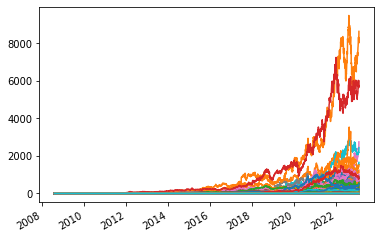

In [217]:
cum_rets_laplace = (1+bootstrapped_sample_laplace.iloc[:, 0:3000]).cumprod()-1
mean_portfolo_value = cum_rets_laplace.iloc[-1, :].mean()
pct_neg = len(cum_rets_laplace.iloc[-1, :][cum_rets_laplace.iloc[-1, :]<0]) / len(cum_rets_laplace.iloc[-1, :])
print(f'Mean Cum Return = {mean_portfolo_value}\n', f'Percent Cum Rets < 0 = {pct_neg}')
cum_rets_laplace.plot(legend=None)

# Plot Lowest Returns

-2.5990180982036075 4.8009547121663685


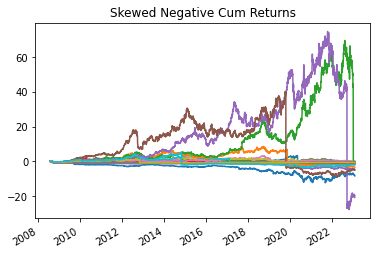

In [223]:
cols = cum_rets_normal_SKEW.iloc[-1, :][cum_rets_normal_SKEW.iloc[-1, :]<0].index
cum_rets_normal_SKEW[cols].plot(legend=None, title='Skewed Negative Cum Returns')
print(cum_rets_normal_SKEW[cols].iloc[-1, :].mean(), cum_rets_normal_SKEW[cols].iloc[-1, :].std())

-0.5426809460451085 0.4577145879888884


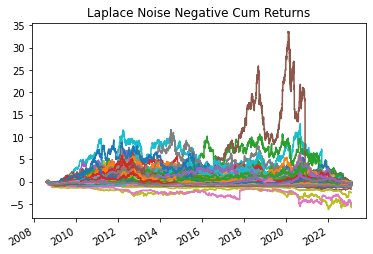

In [218]:
cols = cum_rets_laplace.iloc[-1, :][cum_rets_laplace.iloc[-1, :]<0].index
cum_rets_laplace[cols].plot(legend=None, title='Laplace Noise Negative Cum Returns')
print(cum_rets_laplace[cols].iloc[-1, :].mean(), cum_rets_laplace[cols].iloc[-1, :].std())

-0.3073935555231681 0.1983273506348114


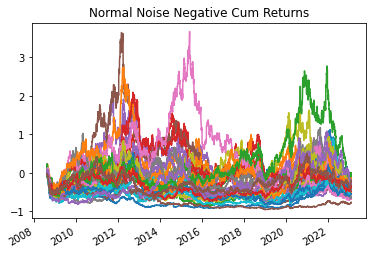

In [219]:
cols = cum_rets_normal.iloc[-1, :][cum_rets_normal.iloc[-1, :]<0].index
cum_rets_normal[cols].plot(legend=None, title='Normal Noise Negative Cum Returns')
print(cum_rets_normal[cols].iloc[-1, :].mean(), cum_rets_normal[cols].iloc[-1, :].std())

# Analyze Distribution

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>, <AxesSubplot:>]], dtype=object)

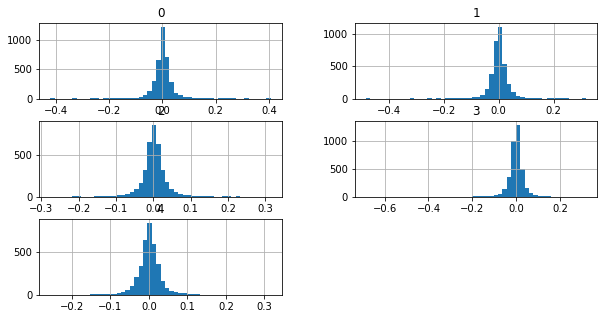

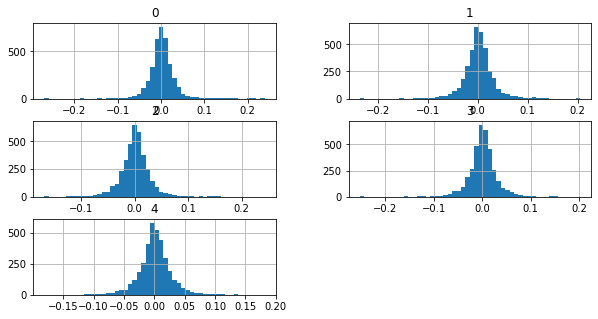

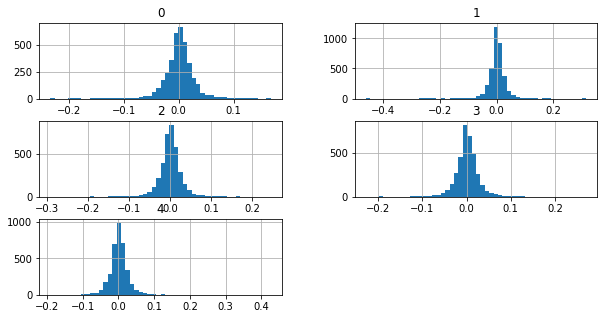

In [220]:
bootstrapped_sample_laplace.iloc[:, 0:5].hist(bins=50, figsize=(10, 5))
bootstrapped_sample_normal.iloc[:, 0:5].hist(bins=50, figsize=(10, 5))
bootstrapped_sample_normal_SKEW.iloc[:, 0:5].hist(bins=50, figsize=(10, 5))

# Historical Distribution

<AxesSubplot:>

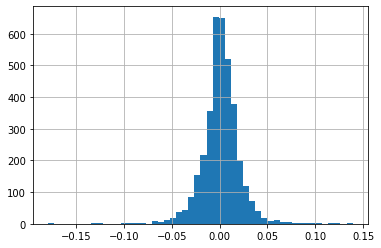

In [221]:
returns.hist(bins=50)